In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew



In [2]:
df = pd.read_csv('water_potability_dt.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,203.505921,21417.593615,6.072638,319.522689,348.527321,12.612966,68.642545,4.613579,0
1,9.043096,181.566663,8273.591971,6.701042,333.775777,372.551219,9.762361,65.216338,4.008499,0
2,7.080795,179.154956,18282.069276,7.874879,326.186856,397.221151,9.438369,57.851079,2.757857,0
3,8.891104,132.497308,18102.395803,7.663440,338.916772,396.547871,16.785914,52.699606,5.035795,1
4,7.149141,214.858379,21596.965396,6.218573,295.554498,328.567489,18.311004,47.619954,4.294295,1
...,...,...,...,...,...,...,...,...,...,...
6180,7.620120,208.705761,34538.573970,5.541937,301.804254,470.658519,15.567839,35.385362,4.647647,0
6181,6.920470,223.299131,17862.105012,7.986599,299.380948,428.894973,12.304739,68.835946,2.707654,0
6182,5.310334,160.450489,9265.086177,9.297600,358.564171,464.619964,11.335761,67.717852,3.486203,0
6183,7.025621,214.379219,23196.754857,4.922396,302.582586,451.057880,6.980777,66.784038,3.097393,1


### Data preprocessing

In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
print(df['ph'].nunique())
print(df['Sulfate'].nunique())
print(df['Trihalomethanes'].nunique())

5932
5784
6105


In [6]:
#df_columns = ['ph','Sulfate','Trihalomethanes']
#for i in df_columns:
 #   df[i] = df[i].fillna(df[i].mean())

In [7]:
df_columns = ['ph','Sulfate','Trihalomethanes']
for i in df_columns:
    df[i] = df[i].fillna(df[i].median())

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
# Calculate skewness for all numeric columns
skewness = df.skew()        # Values close to 0 → Normally distributed          
print(skewness)


ph                 0.061580
Hardness          -0.021574
Solids             0.325358
Chloramines        0.011801
Sulfate            0.036081
Conductivity       0.205142
Organic_carbon     0.024573
Trihalomethanes   -0.046016
Turbidity         -0.026781
Potability         0.959597
dtype: float64


### Insights from Skewness Analysis:

1) Values close to 0 → Normally distributed (e.g., ph, Hardness, Chloramines).

2) Positive Skew (>0.5) → Right-skewed (long right tail) (e.g., Solids, Potability).

3) Negative Skew (<-0.5) → Left-skewed (long left tail) (None in your case).

### Checking and eliminating outliers from my dataset using seaborn

<Axes: >

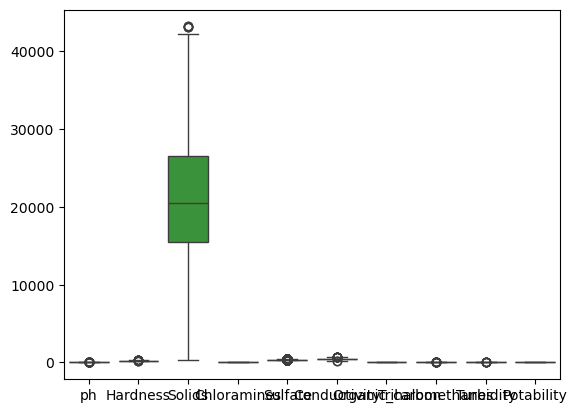

In [10]:
sns.boxplot(df)

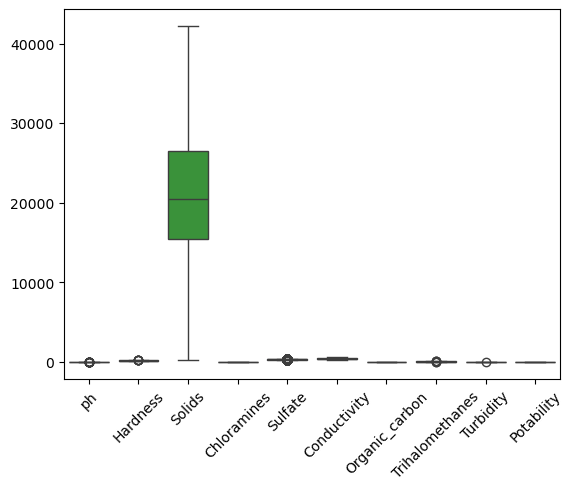

In [11]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Plot again to check
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


<Axes: >

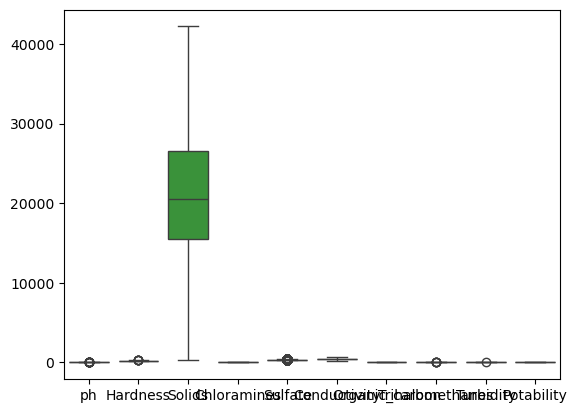

In [12]:
sns.boxplot(df)

### Dividing data into train and test using Train_test_split library

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

In [14]:
y = df['Potability']
X = df.drop('Potability',axis=1)

In [15]:
y

0       0
1       0
2       0
3       1
4       1
       ..
6180    0
6181    0
6182    0
6183    1
6184    0
Name: Potability, Length: 5783, dtype: int64

In [16]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,203.505921,21417.593615,6.072638,319.522689,348.527321,12.612966,68.642545,4.613579
1,9.043096,181.566663,8273.591971,6.701042,333.775777,372.551219,9.762361,65.216338,4.008499
2,7.080795,179.154956,18282.069276,7.874879,326.186856,397.221151,9.438369,57.851079,2.757857
3,8.891104,132.497308,18102.395803,7.663440,338.916772,396.547871,16.785914,52.699606,5.035795
4,7.149141,214.858379,21596.965396,6.218573,295.554498,328.567489,18.311004,47.619954,4.294295
...,...,...,...,...,...,...,...,...,...
6180,7.620120,208.705761,34538.573970,5.541937,301.804254,470.658519,15.567839,35.385362,4.647647
6181,6.920470,223.299131,17862.105012,7.986599,299.380948,428.894973,12.304739,68.835946,2.707654
6182,5.310334,160.450489,9265.086177,9.297600,358.564171,464.619964,11.335761,67.717852,3.486203
6183,7.025621,214.379219,23196.754857,4.922396,302.582586,451.057880,6.980777,66.784038,3.097393


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [19]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
424,5.158396,189.295789,35086.396963,6.736118,340.871819,331.586726,12.909798,61.344664,4.645852
4689,8.773936,176.436592,11636.392455,7.537870,319.276724,394.930072,12.477033,65.512885,3.863599
5566,7.041722,206.301325,10343.474820,7.768921,324.416564,521.326307,16.123949,68.244100,3.051924
2690,7.049914,253.144951,12037.695048,4.470244,325.428049,422.343402,13.166980,39.971236,3.446227
1652,8.875642,228.921587,28487.708598,5.318732,351.960723,474.772519,14.683970,52.578860,4.006992
...,...,...,...,...,...,...,...,...,...
4038,7.051163,163.057831,26281.289813,8.544338,369.872199,403.577568,12.312254,66.414655,5.229881
5560,4.963965,169.270374,25675.214962,7.488212,334.693147,345.387838,13.070474,64.681869,3.908966
5599,6.289685,153.561584,24316.116367,8.131526,367.404571,295.036496,12.617120,91.293685,3.235277
5768,7.061276,177.527136,26274.734116,7.539641,312.395206,313.625185,16.047353,68.657981,3.492991


In [20]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2011,7.136916,181.585649,22687.164946,7.165913,333.411055,525.098169,10.872115,76.780454,3.248526
2209,7.331645,177.639094,23441.311672,9.099770,326.351679,478.510087,14.004992,55.196446,2.834575
3561,7.736167,221.129751,13742.059574,6.362773,287.704381,460.587783,12.555365,66.802426,4.589671
4353,6.104563,161.168687,20331.327018,4.426433,300.819468,383.615052,9.291638,70.800667,4.136943
166,8.419922,157.108969,27070.660393,5.842163,333.839404,356.050106,7.878909,70.800129,2.711565
...,...,...,...,...,...,...,...,...,...
3644,9.489419,199.156046,9082.838343,5.907575,367.324416,501.443510,12.796119,55.769430,3.831454
221,6.262907,185.982652,5157.053600,7.804391,338.195387,570.288260,14.601443,66.396293,4.594919
371,7.355073,214.653878,12247.071138,9.928127,334.183261,361.097965,16.232595,93.432640,3.604529
901,6.745307,218.424637,21871.838700,7.165509,333.775777,373.050102,16.826619,74.086080,3.902353


In [21]:
y_train

424     0
4689    1
5566    0
2690    0
1652    0
       ..
4038    0
5560    1
5599    0
5768    1
926     1
Name: Potability, Length: 4626, dtype: int64

#### Now training a machine learning model - i am using Logistic regreesion and Decison tree classifier and Random forest classifier so  whic will be best will be chosen 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [23]:
lgr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [24]:
lgr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced')

In [25]:
y_pred = lgr.predict(X_test)

In [26]:
print(lgr.score(X_train,y_train),lgr.score(X_test,y_test))
print(dt.score(X_train,y_train),dt.score(X_test,y_test))
print(rf.score(X_train,y_train),rf.score(X_test,y_test))

0.7157371379161263 0.7277441659464131
1.0 0.9369057908383751
1.0 0.975799481417459


In [27]:
from sklearn.metrics import mean_squared_error
# Predict probabilities and convert to binary outputs
y_pred_prob = lgr.predict_proba(X_test)[:, 1]  # Probability of class 1
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert to binary labels

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2722558340535869


In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=10)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = xgb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.9602420051858254
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       842
           1       0.97      0.88      0.92       315

    accuracy                           0.96      1157
   macro avg       0.96      0.94      0.95      1157
weighted avg       0.96      0.96      0.96      1157



In [42]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [48]:
import pandas as pd

# Replace `feature_names` with the actual column names from training
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']  # Use actual names

# Convert input to DataFrame
input_df = pd.DataFrame([[6.087306100000082,214.55608597404893,11628.336675478404,7.231926684912577,333.7757766108025,344.0720281513272,13.232307887943024,98.6866204155442,3.666671803251088]], columns=feature_names)

# Predict output
prediction = lgr.predict(input_df)

# Print result
print("Predicted Output:", prediction[0])


Predicted Output: 0


In [46]:
import pandas as pd

# Replace `feature_names` with the actual column names from training
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']  # Use actual names

# Convert input to DataFrame
input_df = pd.DataFrame([[9.035964226502784,267.80485916816536,34417.317986916976,4.946835929289719,335.8074573460412,346.9759449946687,14.26450548539682,65.37000165741998,3.670629958547809]], columns=feature_names)

# Predict output
prediction = lgr.predict(input_df)

# Print result
print("Predicted Output:", prediction[0])


Predicted Output: 0


In [32]:
import numpy as np

# Example input (replace with actual values)
input_data = [[8.137767883092494,203.8618673386868,24172.70331260775,6.844017626422233,305.83257968719704,470.83626451802894,19.232961414138344,30.708421300394185,5.003825786209145]]  # Replace with real feature values

# Convert to NumPy array (if needed)
input_array = np.array(input_data)

# Predict output using XGBoost
prediction = xgb.predict(input_array)

# If using XGBoost classifier, convert probabilities to class labels
predicted_class = [round(p) for p in prediction]

print("Predicted Output:", predicted_class[0])


Predicted Output: 1


6.273805781551276,191.8503964181032,15130.154367811052,5.112750509869737,349.9495295846939,538.2037133575559,12.383597205246076,52.09768737909524,4.5104053244440205

In [33]:
import numpy as np

# Example input (replace with actual values)
input_data = [[6.273805781551276,191.8503964181032,15130.154367811052,5.112750509869737,349.9495295846939,538.2037133575559,12.383597205246076,52.09768737909524,4.5104053244440205]]  # Replace with real feature values

# Convert to NumPy array (if needed)
input_array = np.array(input_data)

# Predict output using XGBoost
prediction = xgb.predict(input_array)

# If using XGBoost classifier, convert probabilities to class labels
predicted_class = [round(p) for p in prediction]

print("Predicted Output:", predicted_class[0])


Predicted Output: 0


## Conclusion

So i tried with Logistic regression but it is not giving any output so i used XGBoost model in which the model is predicting good

In [40]:
import pickle

# Save the trained XGBoost model
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

print("Model saved successfully!")


Model saved successfully!
